<a href="https://colab.research.google.com/github/soumyajoykundu/Data_Driven_Graph_Construction/blob/main/Data_driven_Graph_Construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data-driven Graph Construction: Unlocking Insights through Clustering and Partitioning**

### $\texttt{Turning Theory into Reality: Code Implementation}$
* Chennai Mathematical Institute
* Linear Algebra and its Applications - Project
* Team members:
  * Soumyajoy Kundu | MDS202349
  * Sreeja Choudhury | MDS202350
  * Suneha Sen | MDS202351
  * Soumya Dasgupta | MDS202348


### Installing $\texttt{graphlearning}$ package to get some graph datsets.

In [ ]:
pip install graphlearning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.3/77.3 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for graphlearning: filename=graphlearning-1.5.3-cp310-cp310-linux_x86_64.whl size=160324 sha256=b0fb3f9b6e95c17b73576aad036b43431b3b56f98ed23ccd7ebb5a8a224e2b12
  Stored in directory: /root/.cache/pip/wheels/6f/cf/40/9f1e98eba5b0c071f36b8aa4f3f836f5a0c1b5a6b3df64a091
Successfully built graphlearning


### Importing Libraries

In [ ]:
import graphlearning as gl
from sklearn.cluster import DBSCAN, KMeans
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

# Clustering
* The following experiments have raw datasets, which are unlabelled.
* We wish to find patterns in the data using clustering algorithms.
* Converted the data to graph to perform spectral partitioning, in a way to cluster the data.

## Experiment 1 : Make Moons dataset

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Spectral Partitioning')

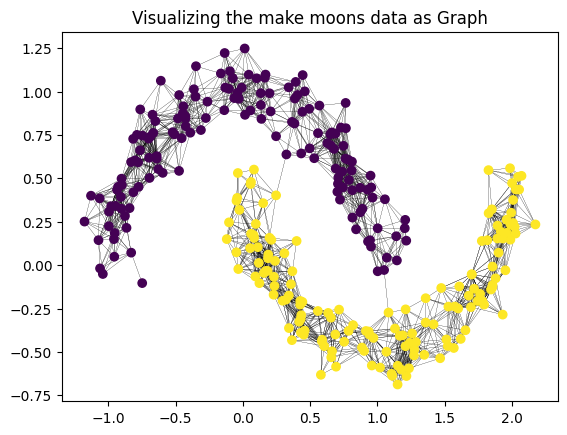

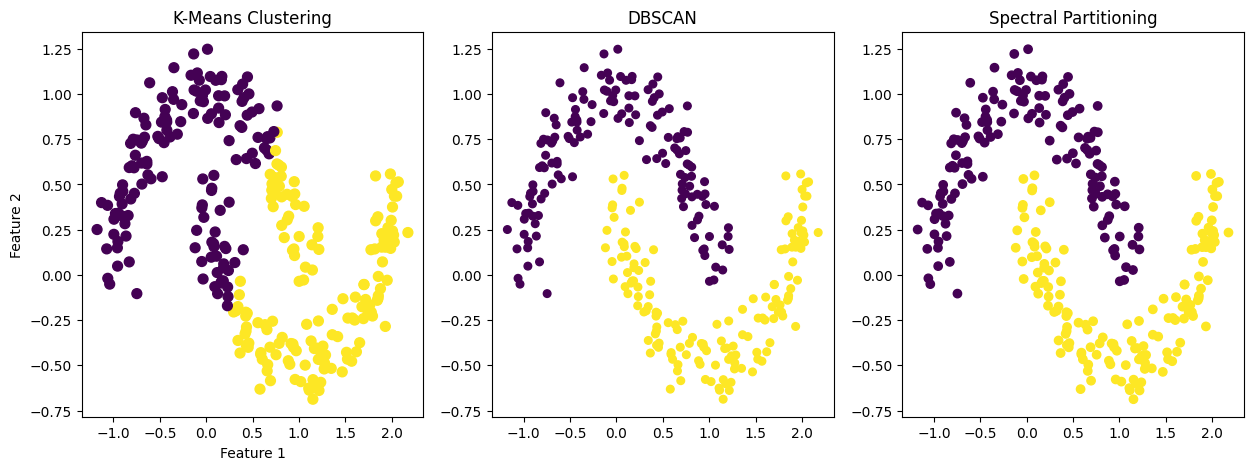

In [ ]:
n=300 # Number of data points

X,L = datasets.make_moons(n_samples=n,noise=0.1)


#Build graph and draw
W = gl.weightmatrix.epsilon_ball(X,0.25)
G = gl.graph(W)
G.draw(X=X,c=L,linewidth=0.1)
plt.title('Visualizing the make moons data as Graph')

# Apply k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the clusters
axes[0].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')


clus = DBSCAN(eps = 0.2, min_samples=3)
clus.fit(X)
axes[1].scatter(X[:, 0], X[:, 1], c = clus.labels_, cmap="viridis", marker="o", s=30)
axes[1].set_title("DBSCAN")

#Spectral clustering
v = G.fiedler_vector()
axes[2].scatter(X[:,0],X[:,1],c=v>0)
axes[2].set_title('Spectral Partitioning')


In [ ]:
labels = kmeans.labels_
acc1 = np.mean(labels == L)
acc2 = np.mean(labels != L)
print('KMeans accuracy = %.2f%%'%(100*max(acc1,acc2)))

KMeans accuracy = 74.67%


In [ ]:
labels = clus.labels_
acc1 = np.mean(labels == L)
acc2 = np.mean(labels != L)
print('DBSCAN accuracy = %.2f%%'%(100*max(acc1,acc2)))

DBSCAN accuracy = 99.67%


In [ ]:
labels = [1 if value >= 0 else 0 for value in v]
acc1 = np.mean(labels == L)
acc2 = np.mean(labels != L)
print('Spectral partitioning accuracy = %.2f%%'%(100*max(acc1,acc2)))

Spectral partitioning accuracy = 99.67%


## Experiment 2 : Make Circles dataset

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Spectral Partitioning')

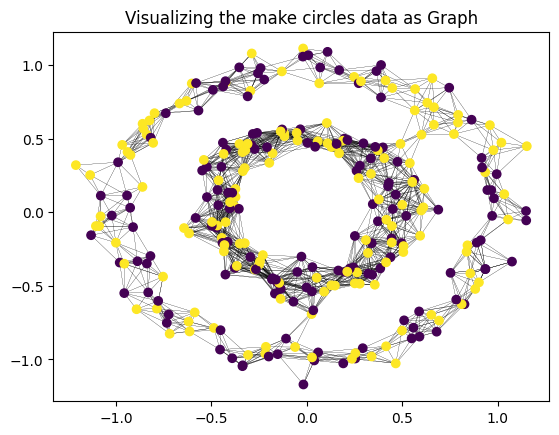

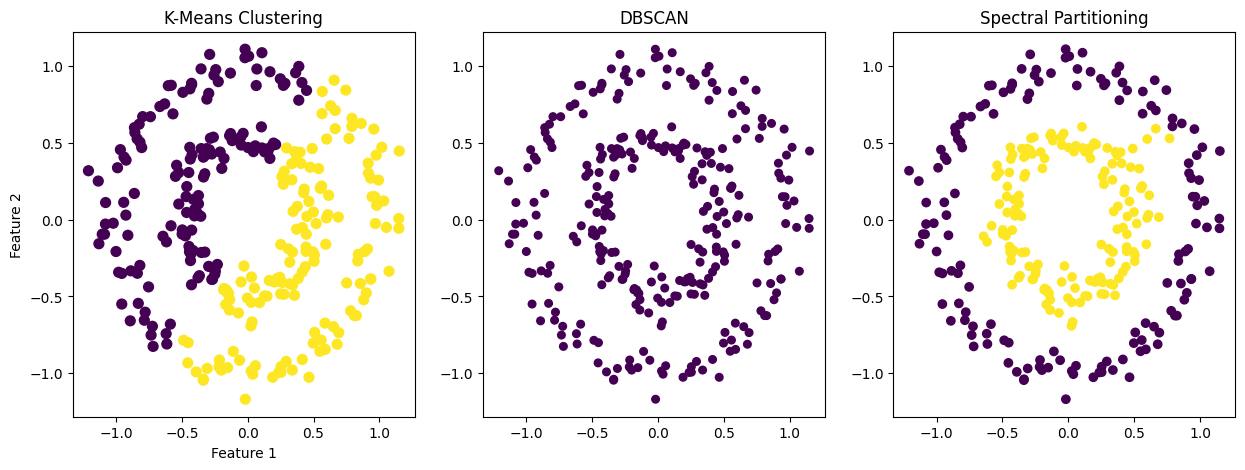

In [ ]:
n=300 # Number of data points

X1,L1 = datasets.make_circles(n_samples=n,noise=0.075,factor=0.5)


#Build graph and draw
W = gl.weightmatrix.epsilon_ball(X1,0.25)
G = gl.graph(W)
G.draw(X=X1,c=L,linewidth=0.1)
plt.title('Visualizing the make circles data as Graph')

# Apply k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X1)
y_kmeans = kmeans.predict(X1)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the clusters
axes[0].scatter(X1[:, 0], X1[:, 1], c=y_kmeans, s=50, cmap='viridis')
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')


clus = DBSCAN(eps = 0.18, min_samples=3)
clus.fit(X1)
axes[1].scatter(X1[:, 0], X1[:, 1], c = clus.labels_, cmap="viridis", marker="o", s=30)
axes[1].set_title("DBSCAN")

#Spectral clustering
v = G.fiedler_vector()
axes[2].scatter(X1[:,0],X1[:,1],c=v>0)
axes[2].set_title('Spectral Partitioning')


In [ ]:
labels = kmeans.labels_
acc1 = np.mean(labels == L1)
acc2 = np.mean(labels != L1)
print('KMeans accuracy = %.2f%%'%(100*max(acc1,acc2)))

KMeans accuracy = 51.00%


In [ ]:
labels = clus.labels_
acc1 = np.mean(labels == L1)
acc2 = np.mean(labels != L1)
print('DBSCAN accuracy = %.2f%%'%(100*max(acc1,acc2)))

DBSCAN accuracy = 100.00%


In [ ]:
labels = [1 if value >= 0 else 0 for value in v]
acc1 = np.mean(labels == L1)
acc2 = np.mean(labels != L1)
print('Spectral Partitioning accuracy = %.2f%%'%(100*max(acc1,acc2)))

Spectral clustering accuracy = 100.00%


# Partitioning
* Datasets are of graph structure
* We wish to partition it into two equal parts such that,
    * Two sub-graphs has approximately equal size
    * Number of edges across the cut is minimum.

## Experiment 3 : Zachary karate dataset

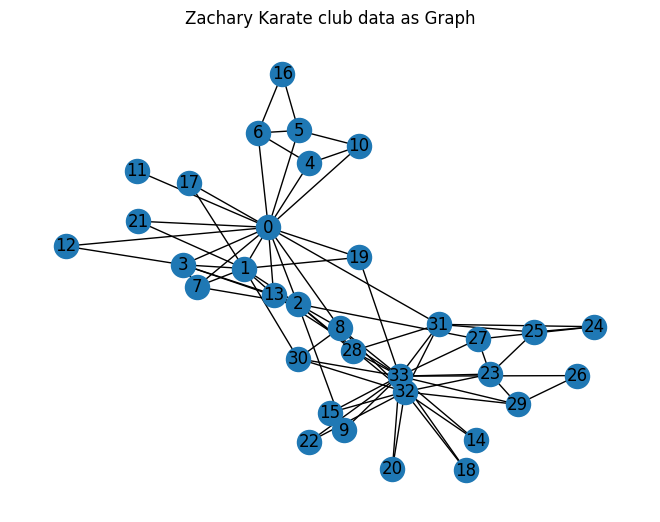

In [ ]:
import networkx as nx
#G = gl.datasets.load_graph('karate')
G = nx.karate_club_graph()
labels = nx.get_node_attributes(G, 'club')
labels
pos = nx.spring_layout(G, seed=42)  # Position nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=True)
plt.title("Zachary Karate club data as Graph")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


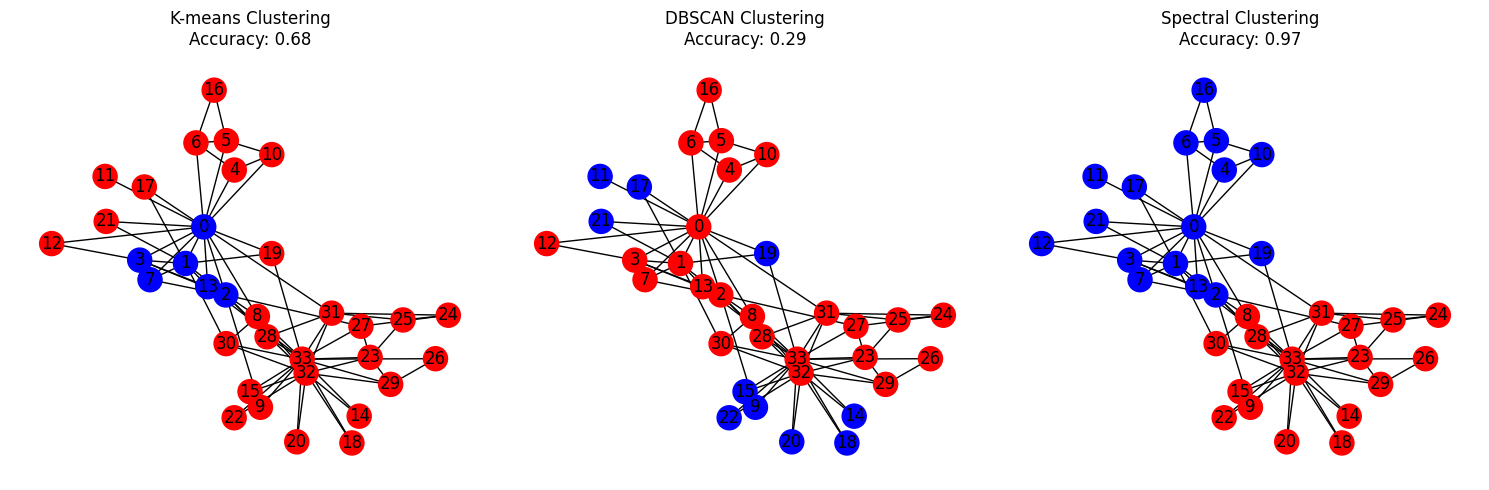

In [ ]:
from sklearn.metrics import accuracy_score

# Extract ground truth labels
ground_truth = [1 if G.nodes[i]['club'] == 'Mr. Hi' else 0 for i in G.nodes()]

# Apply Spectral clustering
adj_matrix = nx.to_numpy_array(G)  # Adjacency matrix
eigenvalues, eigenvectors = np.linalg.eigh(adj_matrix)
fiedler_vector = nx.fiedler_vector(G)  # Second smallest eigenvector
spectral_labels = [1 if val < 0 else 0 for val in fiedler_vector]

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(adj_matrix)
kmeans_labels = kmeans.labels_

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=3)
dbscan_labels = dbscan.fit_predict(adj_matrix)

# Calculate accuracies
kmeans_accuracy = accuracy_score(ground_truth, kmeans_labels)
dbscan_accuracy = accuracy_score(ground_truth, dbscan_labels)
spectral_accuracy = accuracy_score(ground_truth, spectral_labels)

# Visualize the results
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(15, 5))

# Plot K-means clustering result
plt.subplot(1, 3, 1)
nx.draw(G, pos, with_labels=True, node_color=['r' if label == 0 else 'b' for label in kmeans_labels])
plt.title(f"K-means Clustering\nAccuracy: {kmeans_accuracy:.2f}")

# Plot DBSCAN clustering result
plt.subplot(1, 3, 2)
nx.draw(G, pos, with_labels=True, node_color=['r' if label == -1 else 'b' for label in dbscan_labels])
plt.title(f"DBSCAN Clustering\nAccuracy: {dbscan_accuracy:.2f}")

# Plot Spectral clustering result
plt.subplot(1, 3, 3)
nx.draw(G, pos, with_labels=True, node_color=['r' if label == 0 else 'b' for label in spectral_labels])
plt.title(f"Spectral Partitioning\nAccuracy: {spectral_accuracy:.2f}")

plt.tight_layout()
plt.show()

#### Performance of Spectral Partitioning using fiedler vector

In [ ]:
partition = np.array([1 if value >= 0 else 0 for value in fiedler_vector])

In [ ]:
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_true == partition

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

#### Performance of K-Means Clustering

In [ ]:
# Get the club membership (node attributes)
club_membership = [G.nodes[node]['club'] for node in G.nodes()]

# Encode the club membership as numeric labels
label_encoder = {"Mr. Hi": 0, "Officer": 1}
club_membership_encoded = [label_encoder[club] for club in club_membership]

# Convert the encoded labels to numpy array
X = np.array(club_membership_encoded).reshape(-1, 1)

num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.labels_

In [ ]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
cluster_labels == y_true

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

#### Performance of DBSCAN

In [ ]:
epsilon = 0.5  # Maximum distance between points in the same neighborhood
min_samples = 2  # Minimum number of points in a neighborhood to form a core point

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan.fit(X)

# Get the cluster labels
cluster_labels = dbscan.labels_

In [ ]:
cluster_labels == y_true

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

### Experiment 4 : Friendship Network

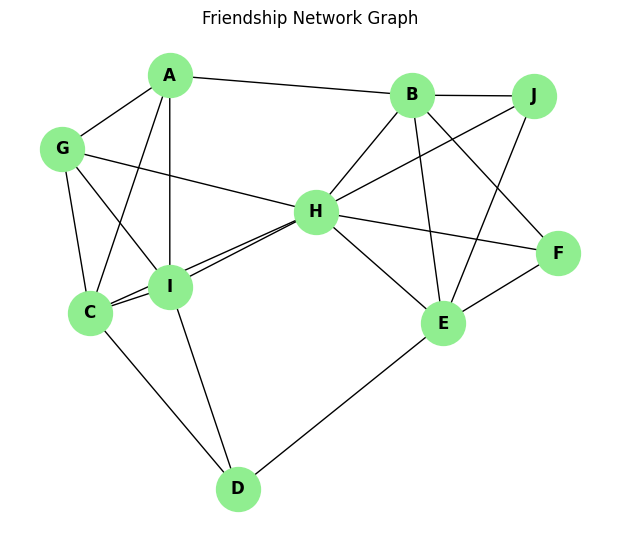

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, DBSCAN

# Define the friendship network
friendship_network = {
    'A': ['B', 'C', 'G', 'I'],
    'B': ['A', 'E', 'F', 'H', 'J'],
    'C': ['A', 'D', 'G', 'H', 'I'],
    'D': ['C', 'E', 'I'],
    'E': ['B', 'D', 'F', 'H', 'J'],
    'F': ['E', 'H'],
    'G': ['A', 'C', 'H', 'I'],
    'H': ['B', 'C', 'E', 'F', 'G', 'I', 'J'],
    'I': ['A', 'C', 'D', 'G', 'H'],
    'J': ['B', 'E', 'H']
}

# Create the graph
G = nx.Graph()

# Add nodes and edges to the graph
for person, friends in friendship_network.items():
    G.add_node(person)
    for friend in friends:
        G.add_edge(person, friend)

# Draw the graph
plt.figure(figsize=(6, 5))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightgreen', font_size=12, font_weight='bold')
plt.title('Friendship Network Graph')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


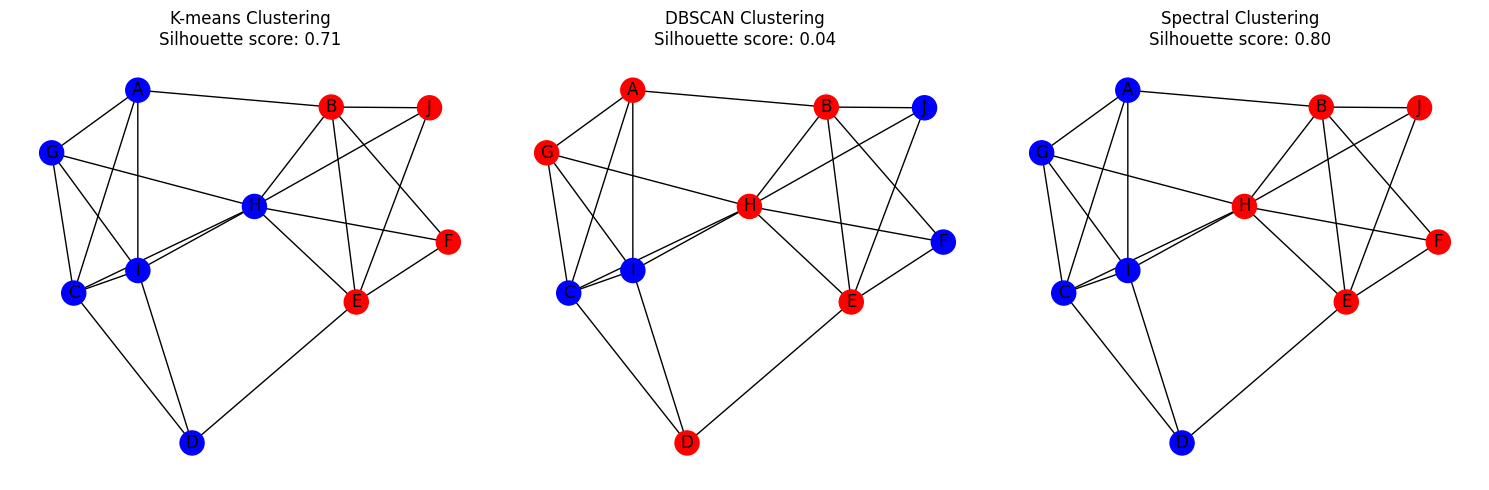

In [ ]:
from sklearn.metrics import silhouette_score

# Apply Spectral clustering
adj_matrix = nx.to_numpy_array(G)  # Adjacency matrix
eigenvalues, eigenvectors = np.linalg.eigh(adj_matrix)
fiedler_vector = nx.fiedler_vector(G)  # Second smallest eigenvector
spectral_labels = [1 if val < 0 else 0 for val in fiedler_vector]

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(adj_matrix)
kmeans_labels = kmeans.labels_

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(adj_matrix)

# Calculate accuracies
silhouette_score_kmeans = silhouette_score(fiedler_vector.reshape(-1, 1), kmeans_labels)
silhouette_score_dbscan = silhouette_score(fiedler_vector.reshape(-1, 1), dbscan_labels)
silhouette_score_fiedler = silhouette_score(fiedler_vector.reshape(-1, 1), spectral_labels)

# Visualize the results
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(15, 5))

# Plot K-means clustering result
plt.subplot(1, 3, 1)
nx.draw(G, pos, with_labels=True, node_color=['r' if label == 0 else 'b' for label in kmeans_labels])
plt.title(f"K-means Clustering\nSilhouette score: {silhouette_score_kmeans:.2f}")

# Plot DBSCAN clustering result
plt.subplot(1, 3, 2)
nx.draw(G, pos, with_labels=True, node_color=['r' if label == -1 else 'b' for label in dbscan_labels])
plt.title(f"DBSCAN Clustering\nSilhouette score: {silhouette_score_dbscan:.2f}")

# Plot Spectral clustering result
plt.subplot(1, 3, 3)
nx.draw(G, pos, with_labels=True, node_color=['r' if label == 0 else 'b' for label in spectral_labels])
plt.title(f"Spectral Partitioning\nSilhouette score: {silhouette_score_fiedler:.2f}")

plt.tight_layout()
plt.show()

# Conversion of Tabular data to Graph data

## Experiment 5 : IPL Players' Network
* Sample generated dataset
* Consists of 100 data points
* Each representing an IPL player with various
attributes such as team affiliation, playing role, performance statistics ($\texttt{runs}$, $\texttt{wickets}$, $\texttt{matches}$
$\texttt{played}$), and match outcomes.

In [ ]:
import pandas as pd

# Load the excel file into a DataFrame
ipl_data = pd.read_excel('ipl_data.xlsx')

In [ ]:
ipl_data

,Player,Team,Role,Runs,Wickets,Matches_Played,Match_Result
0,Rashid Khan,MI,All-Rounder,765,50,18,Win
1,MS Dhoni,DC,All-Rounder,672,36,8,Tie
2,Ravindra Jadeja,CSK,Batsman,352,26,9,Loss
3,Rashid Khan,RR,Bowler,1,26,16,Tie
4,Jasprit Bumrah,RCB,Batsman,399,36,17,Tie
...,...,...,...,...,...,...,...
95,David Warner,MI,Batsman,239,42,17,Win
96,Chris Gayle,KKR,Batsman,28,7,17,Loss
97,Ravindra Jadeja,SRH,Batsman,656,43,12,Tie
98,AB de Villiers,KXIP,All-Rounder,711,9,10,Loss


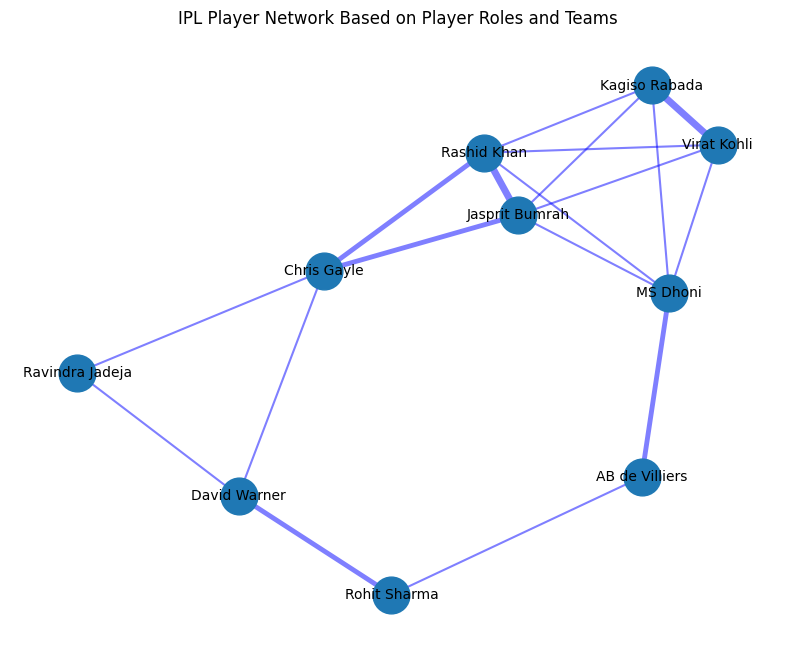

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load IPL data
# ipl_data = pd.read_csv('ipl_data_complex.csv')

# Create a graph
G = nx.Graph()

# Add nodes (players)
for index, row in ipl_data.iterrows():
    G.add_node(row['Player'], team=row['Team'], role=row['Role'])

# Define parameters for creating edges
same_team_factor = 0.7  # Weight for connecting players from the same team
same_role_factor = 0.3  # Weight for connecting players with the same role

# Add edges based on parameters
for team in ipl_data['Team'].unique():
    players_in_team = ipl_data[ipl_data['Team'] == team]['Player'].tolist()
    for i in range(len(players_in_team)):
        for j in range(i + 1, len(players_in_team)):
            player1, player2 = players_in_team[i], players_in_team[j]
            team_factor = same_team_factor if G.nodes[player1]['team'] == G.nodes[player2]['team'] else 0
            role_factor = same_role_factor if G.nodes[player1]['role'] == G.nodes[player2]['role'] else 0
            weight = team_factor + role_factor
            if weight > 0 and player1 != player2:
                G.add_edge(player1, player2, weight=weight)

# Visualize the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.3)  # positions for all nodes
weights = [G[u][v]['weight'] * 5 for u, v in G.edges()]
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.5, edge_color='b')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
plt.title("IPL Player Network Based on Player Roles and Teams")
plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


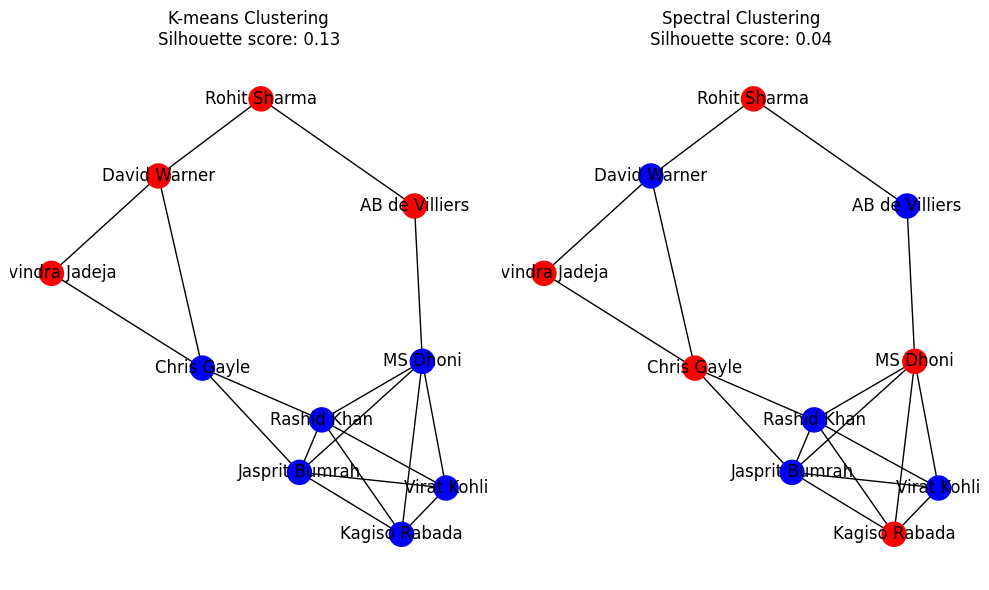

In [ ]:
from sklearn.metrics import silhouette_score
# Convert the graph to an adjacency matrix
adj_matrix = nx.to_numpy_array(G)

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(adj_matrix)
silhouette_score_kmeans = silhouette_score(adj_matrix, kmeans_labels)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(adj_matrix)
if len(np.unique(dbscan_labels)) > 1:
    silhouette_score_dbscan = silhouette_score(adj_matrix, dbscan_labels)
else:
    silhouette_score_dbscan = None

# Calculate the Fiedler vector for Spectral clustering
eigenvalues, eigenvectors = np.linalg.eigh(adj_matrix)
fiedler_vector = eigenvectors[:, 1]  # Second smallest eigenvector
spectral_labels = [1 if val < 0 else 0 for val in fiedler_vector]
if len(np.unique(spectral_labels)) > 1:
    silhouette_score_fiedler = silhouette_score(adj_matrix, spectral_labels)
else:
    silhouette_score_fiedler = None

# Visualize the results
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)

# Plot K-means clustering result
plt.subplot(1, 2, 1)
nx.draw(G, pos, with_labels=True, node_color=['r' if label == 0 else 'b' for label in kmeans_labels])
plt.title(f"K-means Clustering\nSilhouette score: {silhouette_score_kmeans:.2f}")


# Plot Spectral clustering result if silhouette score is available
plt.subplot(1, 2, 2)
if silhouette_score_fiedler is not None:
    nx.draw(G, pos, with_labels=True, node_color=['r' if label == 0 else 'b' for label in spectral_labels])
    plt.title(f"Spectral Clustering\nSilhouette score: {silhouette_score_fiedler:.2f}")
else:
    plt.title("Spectral Clustering\nSingle Cluster")

plt.tight_layout()
plt.show()